In [84]:
# data analysis and wrangling
import numpy as np
import pandas as pd
# data visulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#machine learning 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
train=pd.read_csv("titanic_train.csv")
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Asim, Mr. Adola",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [8]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

# Distribution Analysis

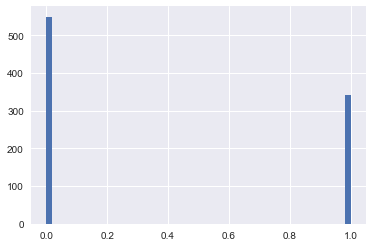

In [13]:
train['Survived'].hist(bins=50)

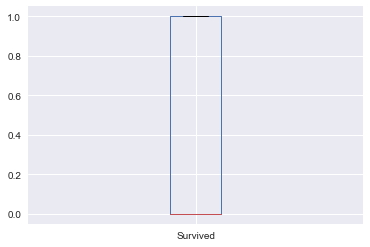

In [14]:
train.boxplot(column='Survived')

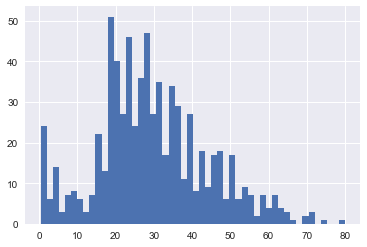

In [15]:
train['Age'].hist(bins=50)

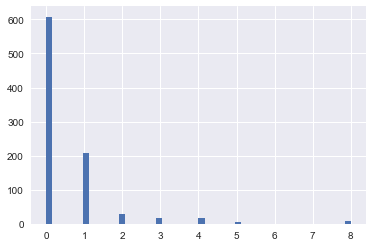

In [18]:
train['SibSp'].hist(bins=50)

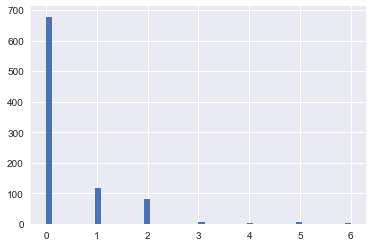

In [19]:
train['Parch'].hist(bins=50)

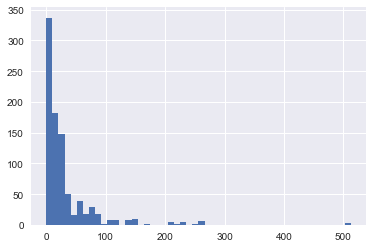

In [22]:
train['Fare'].hist(bins=50)

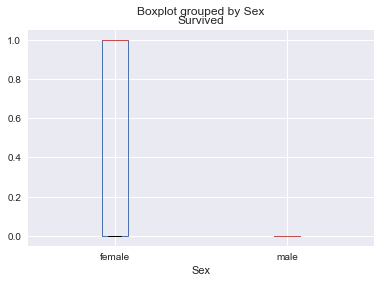

In [23]:
train.boxplot(column='Survived', by = 'Sex')

In [30]:
sexservived = train.pivot_table(values='Survived',index=['Sex'])
sexservived

,Survived
Sex,
female,0.742038
male,0.188908


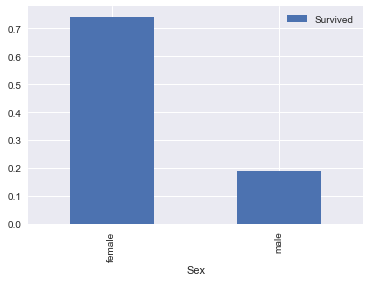

In [31]:
sexservived.plot(kind="bar")

In [32]:
sexser=pd.crosstab(train['Survived'],train['Sex'])
sexser

Sex,female,male
Survived,,
0,81,468
1,233,109


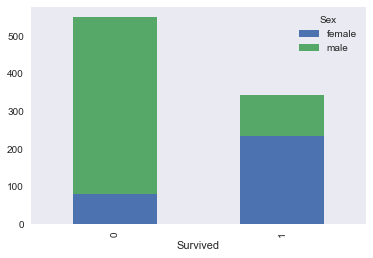

In [38]:
sexser.plot(kind="bar",stacked=True,grid=False)

In [40]:
serclass=train.pivot_table(values='Survived',index=['Pclass'])
serclass

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [41]:
train[['Survived','Pclass']].groupby(['Pclass']).mean().sort_values('Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


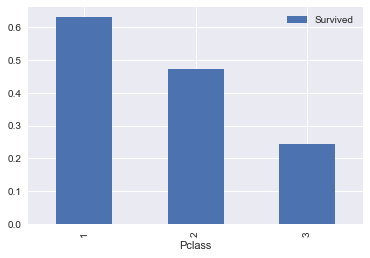

In [43]:
serclass.plot(kind="bar")

In [45]:
train['Title']=train['Name'].str.extract('([A-Za-z]+)\.')

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [46]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Mme           1
Sir           1
Capt          1
Don           1
Jonkheer      1
Lady          1
Ms            1
Countess      1
Name: Title, dtype: int64

In [47]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Mme           1
Sir           1
Capt          1
Don           1
Jonkheer      1
Lady          1
Ms            1
Countess      1
Name: Title, dtype: int64

In [48]:
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [49]:
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [51]:
title_sur=train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
title_sur

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


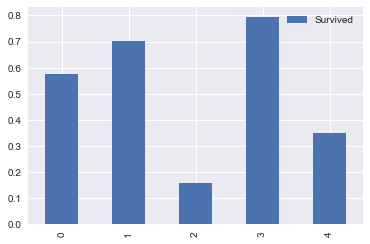

In [52]:
title_sur.plot(kind="bar")

In [56]:
train.apply(lambda x: sum(x.isnull()),axis=0) 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [57]:
train['Age']=train.Age.fillna(train.Age.mean())

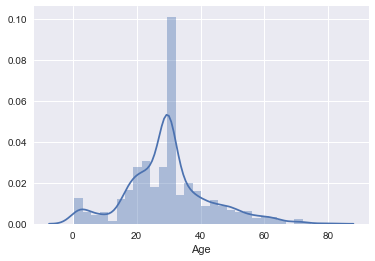

In [58]:
sns.distplot(train['Age'])

In [61]:
train['Age-band']=pd.cut(train['Age'],5)
train['Age-band'].value_counts()

(16.336, 32.252]    523
(32.252, 48.168]    188
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: Age-band, dtype: int64

In [62]:
train.loc[train['Age']<16,'Age']=1
train.loc[(train['Age']>=16)&(train['Age']<32),'Age']=2
train.loc[(train['Age']>=32)&(train['Age']<48),'Age']=3
train.loc[(train['Age']>=48)&(train['Age']<64),'Age']=4
train.loc[(train['Age']>=64),'Age']  =5       

In [63]:
train.Age.value_counts()

2.0    522
3.0    197
1.0     83
4.0     76
5.0     13
Name: Age, dtype: int64

In [64]:
train['Fare-band']=pd.qcut(train['Fare'],4)

In [65]:
train['Fare-band'].value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(31.0, 512.329]    222
(14.454, 31.0]     222
Name: Fare-band, dtype: int64

In [66]:
train.loc[train['Fare']<7,'Fare']=1
train.loc[(train['Fare']>=7)&(train['Fare']<14),'Fare']=2
train.loc[(train['Fare']>=14)&(train['Fare']<31),'Fare']=3
train.loc[(train['Fare']>=31),'Fare']=4

In [67]:
train['Fare'].value_counts()

2.0    408
3.0    230
4.0    225
1.0     28
Name: Fare, dtype: int64

In [68]:
train[['Survived','Fare']].groupby('Fare').mean().sort_values('Survived',ascending=False)

,Survived
Fare,
4.0,0.582222
3.0,0.434783
2.0,0.267157
1.0,0.071429


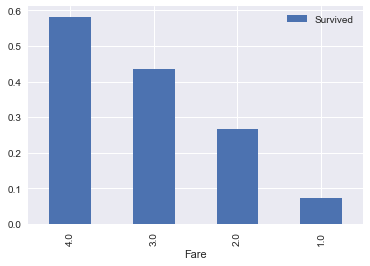

In [69]:
train[['Survived','Fare']].groupby('Fare').mean().sort_values('Survived',ascending=False).plot.bar()

In [70]:
train['FamilySize']=train['SibSp']+train['Parch']+1

In [71]:
train[['Survived','FamilySize']].groupby('FamilySize').mean().sort_values('Survived',ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [72]:
train['Cabin'].isnull().sum()

687

In [73]:
train.drop('Cabin',axis=1,inplace=True)

In [74]:
train['Embarked'].isnull().sum()

2

In [75]:
train.Embarked.fillna('S',inplace=True)

In [76]:
train[['Survived','Embarked']].groupby('Embarked').mean().sort_values('Survived',ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [77]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age-band,Fare-band,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,2.0,S,Mr,"(16.336, 32.252]","(-0.001, 7.91]",2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,4.0,C,Mrs,"(32.252, 48.168]","(31.0, 512.329]",2
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,2.0,S,Miss,"(16.336, 32.252]","(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,4.0,S,Mrs,"(32.252, 48.168]","(31.0, 512.329]",2
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,2.0,S,Mr,"(32.252, 48.168]","(7.91, 14.454]",1


In [78]:
drop_columns=['Name','SibSp','Parch','Ticket','Age-band','Fare-band','PassengerId']
train.drop(drop_columns,axis=1,inplace=True)

In [79]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,male,2.0,2.0,S,Mr,2
1,1,1,female,3.0,4.0,C,Mrs,2
2,1,3,female,2.0,2.0,S,Miss,1
3,1,1,female,3.0,4.0,S,Mrs,2
4,0,3,male,3.0,2.0,S,Mr,1


In [80]:
train['Sex']=train.Sex.map({'male':0,'female':1})
train['Embarked']=train.Embarked.map({'S':0,'C':1,'Q':2})

In [81]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,2.0,2.0,0,Mr,2
1,1,1,1,3.0,4.0,1,Mrs,2
2,1,3,1,2.0,2.0,0,Miss,1
3,1,1,1,3.0,4.0,0,Mrs,2
4,0,3,0,3.0,2.0,0,Mr,1


In [82]:
cat_cols = ['Pclass', 'Age', 'Fare', 'Embarked', 'Title','FamilySize']
train= pd.get_dummies(train, columns = cat_cols,drop_first=True)
train.head()

,Survived,Sex,Pclass_2,Pclass_3,Age_2.0,Age_3.0,Age_4.0,Age_5.0,Fare_2.0,Fare_3.0,...,Title_Mrs,Title_Rare,FamilySize_2,FamilySize_3,FamilySize_4,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_8,FamilySize_11
0,0,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,1,1,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
X=train.iloc[:,1:].values
y=train.iloc[:,0].values
X.shape
y.shape

(891,)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [86]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

F:\Anaconda\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [87]:
X_train

array([[-0.75384477, -0.5078883 ,  0.92682675, ..., -0.12526719,
        -0.08409599, -0.06504853],
       [ 1.32653305, -0.5078883 ,  0.92682675, ..., -0.12526719,
        -0.08409599, -0.06504853],
       [ 1.32653305, -0.5078883 ,  0.92682675, ..., -0.12526719,
        -0.08409599, -0.06504853],
       ..., 
       [-0.75384477, -0.5078883 , -1.07895029, ..., -0.12526719,
        -0.08409599, -0.06504853],
       [-0.75384477, -0.5078883 ,  0.92682675, ..., -0.12526719,
        -0.08409599, -0.06504853],
       [-0.75384477, -0.5078883 ,  0.92682675, ..., -0.12526719,
        -0.08409599, -0.06504853]])

In [88]:
X_test

array([[ -0.75384477,  -0.5078883 ,   0.92682675, ...,  -0.12526719,
         -0.08409599,  -0.06504853],
       [ -0.75384477,  -0.5078883 ,   0.92682675, ...,  -0.12526719,
         -0.08409599,  -0.06504853],
       [  1.32653305,  -0.5078883 ,   0.92682675, ...,  -0.12526719,
         -0.08409599,  -0.06504853],
       ..., 
       [  1.32653305,  -0.5078883 ,   0.92682675, ...,  -0.12526719,
         -0.08409599,  -0.06504853],
       [ -0.75384477,   1.96893685,  -1.07895029, ...,  -0.12526719,
         -0.08409599,  -0.06504853],
       [ -0.75384477,  -0.5078883 ,   0.92682675, ...,  -0.12526719,
         -0.08409599,  15.37313674]])

In [89]:
#Knearest Neighour
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
prediction=knn.predict(X_test)
(prediction==y_test).mean()

0.83798882681564246